Model training


Import library

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [109]:
# import the training module
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

# evaluating matrices
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [110]:
df=pd.read_csv('data/clean_data.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,Total_score,average
0,female,group B,bachelor's degree,standard,none,218,72.666667
1,female,group C,some college,standard,completed,247,82.333333
2,female,group B,master's degree,standard,none,278,92.666667
3,male,group A,associate's degree,free/reduced,none,148,49.333333
4,male,group C,some college,standard,none,229,76.333333


In [111]:
# prepare the dependent and independent variable
X=df.drop(['average'],axis=1)
y=df['average']

In [112]:
#  find the numerical feature and categorical feature
num_feature=X.select_dtypes(exclude="object").columns
cate_feature=X.select_dtypes(include="object").columns
print(f"numerical feature are: {num_feature}")
print(f"Categorical feature are: {cate_feature}")

numerical feature are: Index(['Total_score'], dtype='object')
Categorical feature are: Index(['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch',
       'test_preparation_course'],
      dtype='object')


In [113]:
#  Import liberies
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
numeric_standerd=StandardScaler()
One_HotEncoder=OneHotEncoder(drop="first")
preprocessor=ColumnTransformer([
("One_HotEncoder",One_HotEncoder,cate_feature),
("StandardScaler",numeric_standerd,num_feature)
 ])

In [114]:
#  train to split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [115]:
X_test.shape,X_train.shape

((300, 6), (700, 6))

In [116]:
#  Encode the dataset
X_train=preprocessor.fit_transform(X_train)
X_test=preprocessor.transform(X_test)

In [117]:
#  convert into the dataframe
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

Define the evaluation function

In [118]:
#  create the evaluation function
def evaluation(true,prediction):
    calculate={
        "mean_square_error":mean_squared_error(true,prediction),
        "mean_absolute_error":mean_absolute_error(true,prediction),
        "root_mean_square_error":np.sqrt(mean_squared_error(true,prediction)),
        "r2_score":r2_score(true,prediction)

    }
    return calculate

In [119]:
#  create the model object for training
model={
    "LinearRegression":LinearRegression(),
    "LassoRegression":Lasso(),
    "RidgeRegression":Ridge(),
    "KNeighborsRegressor":KNeighborsRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoostRegressor":CatBoostRegressor(verbose=False)
}

In [123]:
# Make the prediction
model_name1=[]
for model_name,model_model in model.items():
    model_model.fit(X_train,y_train)

    # make the prediction;
    y_train_pred=model_model.predict(X_train)
    y_test_pred=model_model.predict(X_test)

    # evlauate the metrices
    print("Model name ---",model_name)
    model_name1.append(model_name)

    print("Training Evlauation")
    print('\n')
    result=evaluation(y_train,y_train_pred)
    for result_key,result_values in result.items():
        print(f"{result_key}:\n {result_values}")
    print("\n")
    print("Testing Evlauation")
    print('\n')
    result=evaluation(y_test,y_test_pred)
    for result_key,result_values in result.items():
        print(f"{result_key}:{result_values}")
    print("-"*70)

Model name --- LinearRegression
Training Evlauation


mean_square_error:
 3.6390378946675337e-28
mean_absolute_error:
 1.4210854715202004e-14
root_mean_square_error:
 1.9076262460627693e-14
r2_score:
 1.0


Testing Evlauation


mean_square_error:4.209782516075437e-28
mean_absolute_error:1.5608255428863535e-14
root_mean_square_error:2.051775454594249e-14
r2_score:1.0
----------------------------------------------------------------------
Model name --- LassoRegression
Training Evlauation


mean_square_error:
 1.0
mean_absolute_error:
 0.8009843716337328
root_mean_square_error:
 1.0
r2_score:
 0.9947989792200644


Testing Evlauation


mean_square_error:1.1935110032302252
mean_absolute_error:0.8630693910594373
root_mean_square_error:1.0924792918999542
r2_score:0.9947057254301412
----------------------------------------------------------------------
Model name --- RidgeRegression
Training Evlauation


mean_square_error:
 0.0005107582174767598
mean_absolute_error:
 0.018345907979401943
root_

Result Zip..

In [121]:
# R² Scores for Training
r2_score_training = [
    1.0,                 # LinearRegression
    0.9947989792200644,  # LassoRegression
    0.9999973435358974,  # RidgeRegression
    0.9479079628070404,  # KNeighborsRegressor
    1.0,                 # DecisionTreeRegressor
    0.9998665516309372,  # RandomForestRegressor
    0.9945150219361453,  # AdaBoostRegressor
    0.9999627246481954,  # GradientBoostingRegressor
    0.9999987616309924,  # XGBRegressor
    0.9999092260320465   # CatBoostRegressor
]
# R² Scores for Testing
r2_score_testing = [
    1.0,                 # LinearRegression
    0.9947057254301412,  # LassoRegression
    0.9999972726320551,  # RidgeRegression
    0.925974584331934,   # KNeighborsRegressor
    0.9981303576732561,  # DecisionTreeRegressor
    0.9959992887473145,  # RandomForestRegressor
    0.9926809578952037,  # AdaBoostRegressor
    0.99834974164175,    # GradientBoostingRegressor
    0.997615464913512,   # XGBRegressor
    0.9893727377284627   # CatBoostRegressor
]


In [124]:
pd.DataFrame(list(zip(model_name1, r2_score_training,r2_score_testing)),
              columns=['Model Name', 'R2_Score_training','R2_Score_testing']
              ).sort_values(by=["R2_Score_training"],
             ascending=False)

,Model Name,R2_Score_training,R2_Score_testing
0,LinearRegression,1.000000,1.000000
4,DecisionTreeRegressor,1.000000,0.998130
8,XGBRegressor,0.999999,0.997615
2,RidgeRegression,0.999997,0.999997
7,GradientBoostingRegressor,0.999963,0.998350
9,CatBoostRegressor,0.999909,0.989373
5,RandomForestRegressor,0.999867,0.995999
1,LassoRegression,0.994799,0.994706
6,AdaBoostRegressor,0.994515,0.992681
3,KNeighborsRegressor,0.947908,0.925975


As we seen that the linear regression are very good accuracy so we can predit the result with linear regreesion

linear regreesion

In [125]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 100.00


plot the data

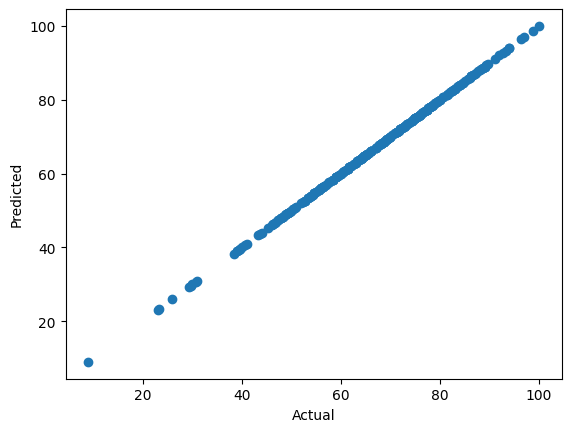

In [137]:
plt.plot(figsize=(25,6))
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('Actual');
plt.ylabel('Predicted');

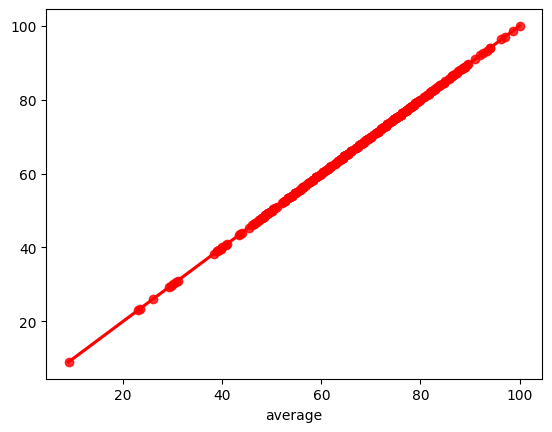

In [131]:
sns.regplot(x=y_test,y=y_pred,color ='red');

Difference betwwen actual and predicted


In [138]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,87.000000,87.000000,1.421085e-14
737,64.000000,64.000000,-1.421085e-14
740,75.000000,75.000000,0.000000e+00
660,74.666667,74.666667,0.000000e+00
411,81.666667,81.666667,0.000000e+00
...,...,...,...
468,83.333333,83.333333,0.000000e+00
935,63.666667,63.666667,-2.842171e-14
428,59.000000,59.000000,-1.421085e-14
7,40.666667,40.666667,-5.684342e-14
